In [1]:
import os

In [2]:
# define repo name and get root working directory
repo = 'global-economy-api'
root_path = os.getcwd()[ 0 : os.getcwd().find( repo ) + len ( repo )]
root_path

'C:\\Users\\crwil\\Documents\\GitHub\\global-economy-api'

In [3]:
# add repo source + notebooks directory to system path
import sys
sys.path.insert(0, os.path.join( root_path, 'src' ) )
sys.path.insert(0, os.path.join( root_path, 'notebooks' ) )

In [4]:
from client import Client

# create request object
obj = Client()

In [5]:
# test indicator name mapping
indicators = [ 'Exports, percent of GDP' ]
uri = obj.getUri( ["India", "China"], Client.Frequency.annual, indicators=indicators, start_year=1960, end_year=2020 )
print ( uri )

# convert response to dataframe
df = obj.convertToDataFrame( obj.postRequest( uri ) )
print ( df )


https://www.theglobaleconomy.com/data_export_api.php?tp=1&ind=19&cnt=IN,CN&prd=1960:2020&uid=90902&uidc=0318f527ddfd08c361f1df372fdfd2e4
      id        date                indicator  value
0    CHN  1960-01-01  Exports, percent of GDP   4.31
1    CHN  1961-01-01  Exports, percent of GDP   3.87
2    CHN  1962-01-01  Exports, percent of GDP   4.05
3    CHN  1963-01-01  Exports, percent of GDP   4.01
4    CHN  1964-01-01  Exports, percent of GDP   3.77
..   ...         ...                      ...    ...
117  IND  2016-01-01  Exports, percent of GDP  19.16
118  IND  2017-01-01  Exports, percent of GDP  18.79
119  IND  2018-01-01  Exports, percent of GDP  19.94
120  IND  2019-01-01  Exports, percent of GDP  18.43
121  IND  2020-01-01  Exports, percent of GDP  18.08

[122 rows x 4 columns]


In [6]:
# convert value to float
df[ 'value' ] = df['value'].astype('float')
df

,id,date,indicator,value
0,CHN,1960-01-01,"Exports, percent of GDP",4.31
1,CHN,1961-01-01,"Exports, percent of GDP",3.87
2,CHN,1962-01-01,"Exports, percent of GDP",4.05
3,CHN,1963-01-01,"Exports, percent of GDP",4.01
4,CHN,1964-01-01,"Exports, percent of GDP",3.77
...,...,...,...,...
117,IND,2016-01-01,"Exports, percent of GDP",19.16
118,IND,2017-01-01,"Exports, percent of GDP",18.79
119,IND,2018-01-01,"Exports, percent of GDP",19.94
120,IND,2019-01-01,"Exports, percent of GDP",18.43


In [7]:
import pandas as pd
pivot_df = df.pivot(index=["indicator", "id" ], columns="date", values="value")
pivot_df

date                         1960-01-01  1961-01-01  1962-01-01  1963-01-01  \
indicator               id                                                    
Exports, percent of GDP CHN        4.31        3.87        4.05        4.01   
                        IND        4.46        4.30        4.17        4.28   

date                         1964-01-01  1965-01-01  1966-01-01  1967-01-01  \
indicator               id                                                    
Exports, percent of GDP CHN        3.77        3.64        3.49        3.28   
                        IND        3.73        3.31        4.14        4.03   

date                         1968-01-01  1969-01-01  ...  2011-01-01  \
indicator               id                           ...               
Exports, percent of GDP CHN        3.30        3.05  ...       26.57   
                        IND        4.04        3.71  ...       24.54   

date                         2012-01-01  2013-01-01  2014-01-01  2015-01-01  \
indicator               id                                                    
Exports, percent of GDP CHN       25.49       24.60       23.51       21.35   
                        IND       24.53       25.43       22.97       19.81   

date                         2016-01-01  2017-01-01  2018-01-01  2019-01-01  \
indicator               id                                                    
Exports, percent of GDP CHN       19.58       19.69       19.11       18.50   
                        IND       19.16       18.79       19.94       18.43   

date                         2020-01-01  
indicator               id               
Exports, percent of GDP CHN       18.50  
                        IND       18.08  

[2 rows x 61 columns]

<AxesSubplot:xlabel='date'>

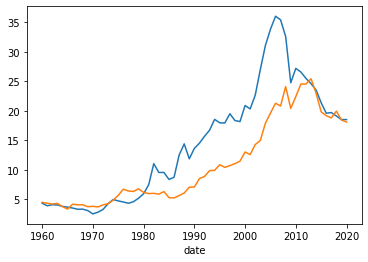

In [8]:
ax = pivot_df.loc[ 'Exports, percent of GDP', 'CHN' ].plot()
pivot_df.loc[ 'Exports, percent of GDP', 'IND' ].plot(ax=ax)

<AxesSubplot:xlabel='date'>

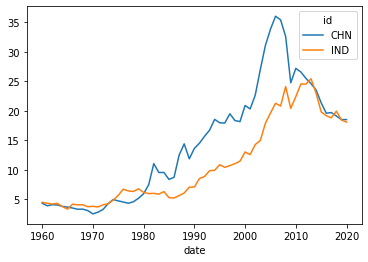

In [9]:
pivot_df.loc[ 'Exports, percent of GDP', : ].transpose( ).reset_index().plot( x='date')